In [1]:
import pandas as pd 
import numpy as np
from sklearn.impute import KNNImputer

In [2]:
import os
import sys

root_folder = os.path.dirname(os.path.abspath(os.getcwd()))
fetching_data_module_folder = root_folder + "\\fetch_data"

sys.path.insert(0, fetching_data_module_folder)

from fetching_satellite_based import remote_sensing_factor_df

In [3]:
atmospheric_factors = ['CLOUD', 'CO', 'HCHO', 'NO2', 'O3', 'SO2', 'AAI']
begin_year = 2019
end_year = 2024
atmospheric_consolidated_df = remote_sensing_factor_df(factor=atmospheric_factors[0], begin=begin_year, end=end_year)

for i in range(1, len(atmospheric_factors)):
    
    factor = atmospheric_factors[i]
    
    factor_df = remote_sensing_factor_df(factor=factor, begin=begin_year, end=end_year)
    
    atmospheric_consolidated_df[factor] = np.array(factor_df[factor])

atmospheric_consolidated_df

,lon,lat,date,ID,CLOUD,CO,HCHO,NO2,O3,SO2,AAI
6570,105.850899,21.021299,2019-01-01,5,1.000000,NaN,NaN,NaN,0.100538,NaN,-1.112399
0,105.741867,21.049749,2019-01-01,19,1.000000,NaN,NaN,NaN,0.100318,NaN,-1.279025
1460,105.948544,21.200344,2019-01-01,51,1.000000,NaN,NaN,NaN,0.101136,NaN,-1.010720
1825,106.288330,21.123247,2019-01-01,52,1.000000,NaN,NaN,NaN,0.099946,NaN,-0.925846
2190,106.111371,21.152745,2019-01-01,53,1.000000,NaN,NaN,NaN,0.100431,NaN,-0.859729
...,...,...,...,...,...,...,...,...,...,...,...
8051,106.314003,20.927000,2024-12-31,172,0.548964,NaN,NaN,NaN,0.114208,NaN,-0.650442
8417,106.430801,20.977400,2024-12-31,173,0.457147,0.04615,NaN,NaN,0.113423,NaN,-0.660913
9149,106.385597,21.116400,2024-12-31,175,0.655623,NaN,NaN,NaN,0.114531,NaN,-0.580081
6587,105.367302,21.338470,2024-12-31,195,1.000000,NaN,NaN,NaN,0.113886,NaN,-0.406657


## Data before imputation

Let's create a copy of the original data with missing values to compare before and after imputation.

In [ ]:
# Save original data before imputation to compare distributions
original_df = atmospheric_consolidated_df.copy()

# Check missing values in the selected factors
selected_factors = ['CLOUD', 'O3', 'AAI']
for factor in selected_factors:
    missing_count = original_df[factor].isna().sum()
    total_count = len(original_df)
    missing_percentage = (missing_count / total_count) * 100
    print(f"{factor}: {missing_count} missing values ({missing_percentage:.2f}% of total)")

In [4]:
imputer = KNNImputer()
imputed_atmospheric = imputer.fit_transform(atmospheric_consolidated_df[['lon', 'lat'] + atmospheric_factors])

In [20]:
selected_features = ['lon', 'lat'] + atmospheric_factors
imputed_atmospheric_consolidated_df = atmospheric_consolidated_df.copy()

In [21]:
for i, feature in enumerate(selected_features):
    imputed_atmospheric_consolidated_df[feature] = imputed_atmospheric_consolidated_df[feature].fillna(pd.Series(imputed_atmospheric[:, i], index=imputed_atmospheric_consolidated_df.index))

## Enhanced Visualization: Probability Distribution Before and After Imputation

Let's create comprehensive plots comparing the distributions of CLOUD, O3, and AAI before and after imputation with detailed statistical information.

In [47]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter
from IPython.display import display, HTML

# Set aesthetically pleasing style with soothing colors
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# Define a visually pleasing color palette for our factors
colors = {
    'CLOUD': '#3498db',  # Soft blue
    'O3': '#2ecc71',     # Soft green
    'AAI': '#9b59b6'     # Soft purple
}

# Create descriptive names for each factor
factor_names = {
    'CLOUD': 'Cloud Cover (CLOUD)',
    'O3': 'Ozone (O3)',
    'AAI': 'Absorbing Aerosol Index (AAI)'
}

In [48]:
original_df = atmospheric_consolidated_df.copy()
# Calculate missing data statistics for each factor
total_records = len(original_df)
print(f"Total records: {total_records:,}")

# Create DataFrame to store statistics
missing_stats = pd.DataFrame(index=selected_factors)

missing_stats['Original_Missing'] = [original_df[factor].isna().sum() for factor in selected_factors]
missing_stats['Original_Present'] = [original_df[factor].count() for factor in selected_factors]
missing_stats['Original_Missing_Percent'] = round(missing_stats['Original_Missing'] / total_records * 100, 2)

missing_stats['Imputed_Missing'] = [imputed_atmospheric_consolidated_df[factor].isna().sum() for factor in selected_factors]
missing_stats['Imputed_Present'] = [imputed_atmospheric_consolidated_df[factor].count() for factor in selected_factors]
missing_stats['Imputed_Missing_Percent'] = round(missing_stats['Imputed_Missing'] / total_records * 100, 2)

missing_stats['Imputed_Values_Count'] = missing_stats['Imputed_Present'] - missing_stats['Original_Present']
missing_stats['Imputed_Values_Percent'] = round(missing_stats['Imputed_Values_Count'] / missing_stats['Original_Missing'] * 100, 2)

# Display the statistics table
display(missing_stats)

Total records: 56,992


,Original_Missing,Original_Present,Original_Missing_Percent,Imputed_Missing,Imputed_Present,Imputed_Missing_Percent,Imputed_Values_Count,Imputed_Values_Percent
CLOUD,5128,51864,9.00,0,56992,0.0,5128,100.0
O3,582,56410,1.02,0,56992,0.0,582,100.0
AAI,337,56655,0.59,0,56992,0.0,337,100.0


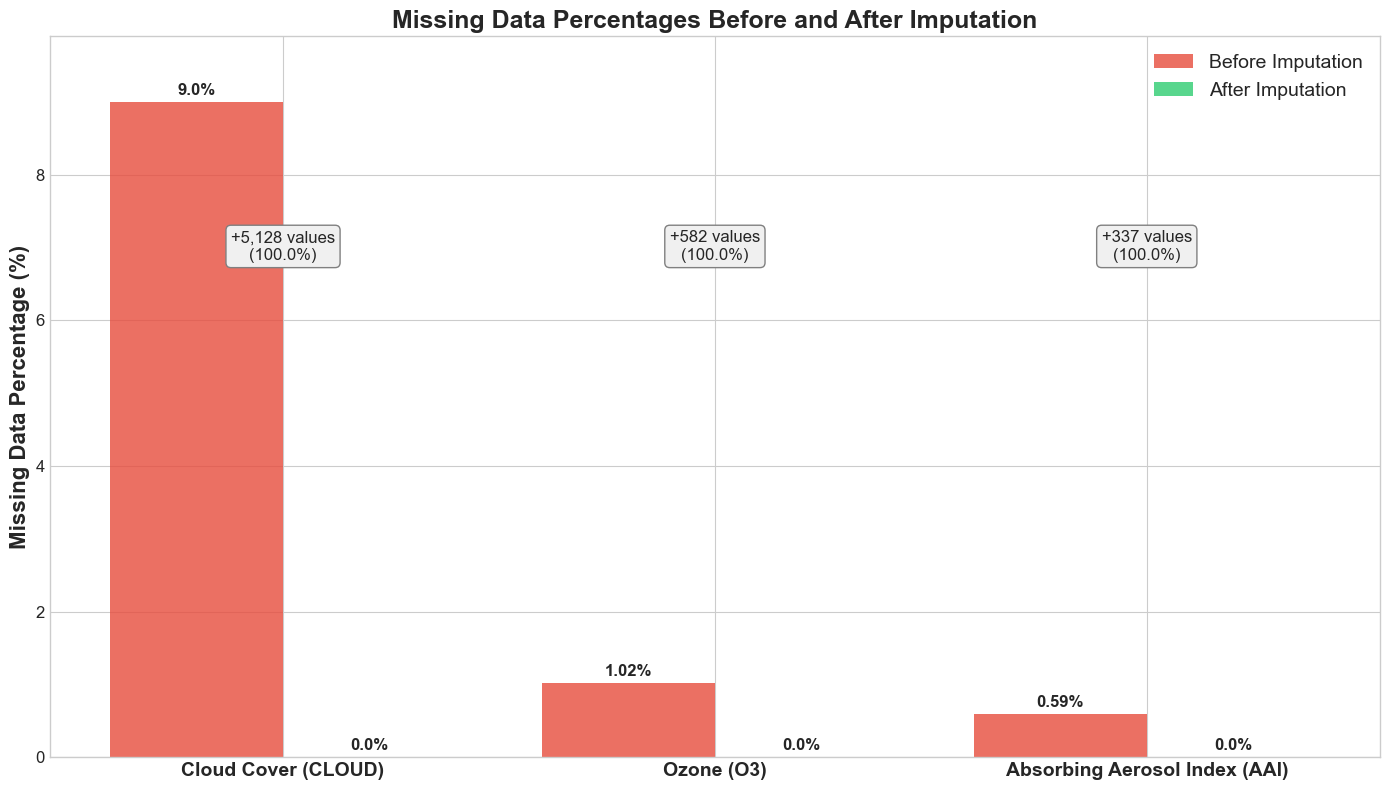

In [49]:
# Bar chart showing missing data percentages before and after imputation
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(selected_factors))
width = 0.4

# Create bars for original data
orig_missing_bars = ax.bar(x - width/2, missing_stats['Original_Missing_Percent'], width, label='Before Imputation',
                         color='#e74c3c', alpha=0.8)

# Create bars for imputed data
imp_missing_bars = ax.bar(x + width/2, missing_stats['Imputed_Missing_Percent'], width, label='After Imputation',
                        color='#2ecc71', alpha=0.8)

# Add labels for each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontweight='bold', fontsize=12)

add_labels(orig_missing_bars)
add_labels(imp_missing_bars)

# Customize the chart
ax.set_title('Missing Data Percentages Before and After Imputation', fontweight='bold', fontsize=18)
ax.set_ylabel('Missing Data Percentage (%)', fontweight='bold', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([factor_names[factor] for factor in selected_factors], fontweight='bold', fontsize=14)
ax.legend(fontsize=14, loc='upper right')
ax.set_ylim(0, max(missing_stats['Original_Missing_Percent']) * 1.1)  # Add space for labels

# Add labels showing the number of values that were imputed
for i, factor in enumerate(selected_factors):
    imputed_count = missing_stats.loc[factor, 'Imputed_Values_Count']
    imputed_percent = missing_stats.loc[factor, 'Imputed_Values_Percent']
    ax.annotate(f'+{imputed_count:,} values\n({imputed_percent}%)',
               xy=(i, 8),  # Position slightly higher
               xytext=(0, -40),
               textcoords="offset points",
               ha='center', va='top', fontsize=12,
               bbox=dict(boxstyle="round,pad=0.3", fc="#f0f0f0", ec="gray", lw=1))

plt.tight_layout()
plt.show()

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

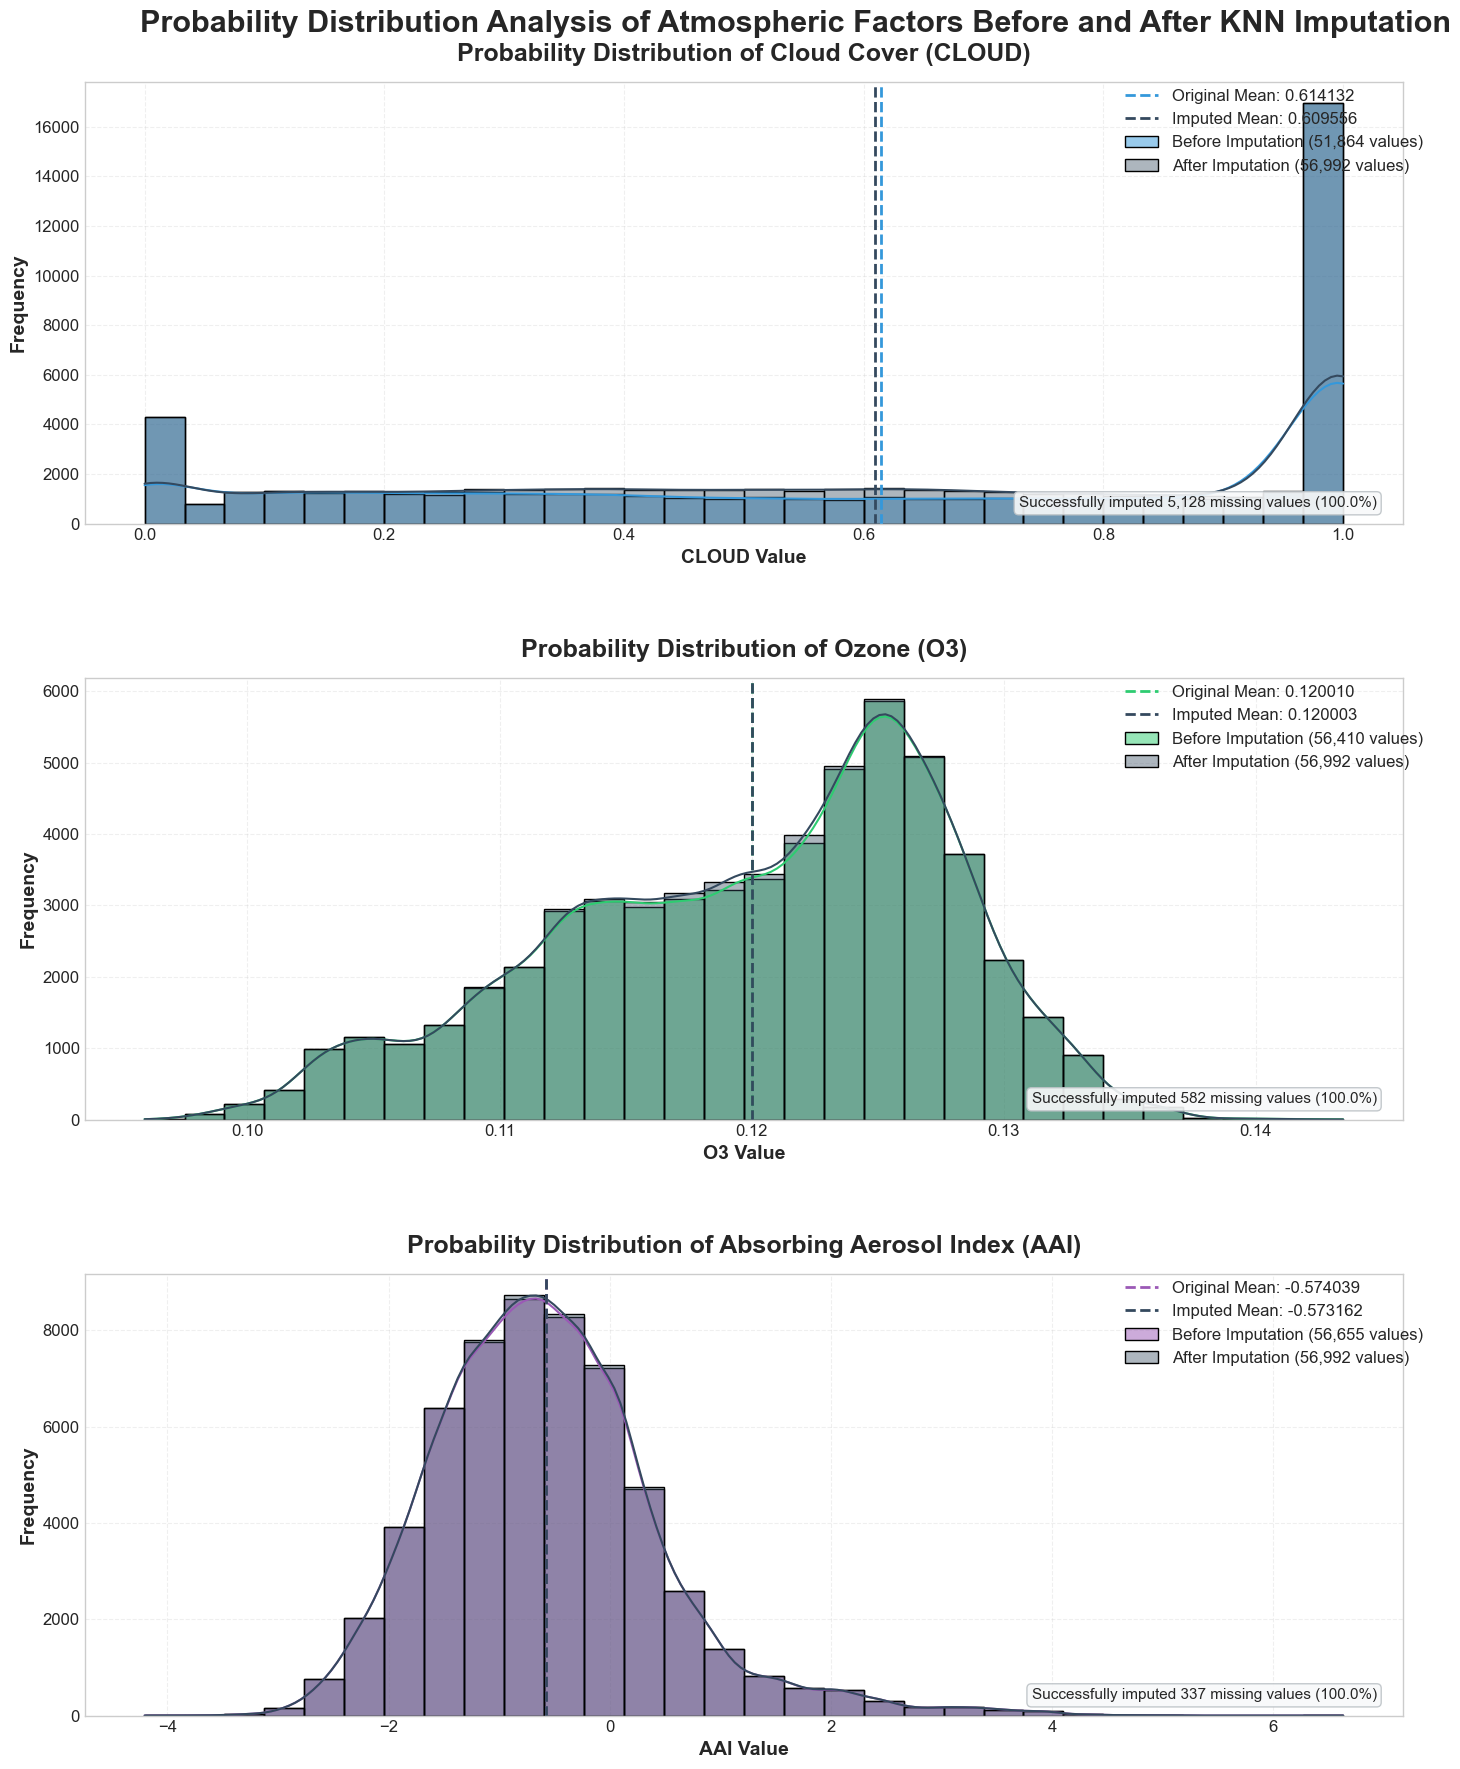

In [ ]:
# Create enhanced distribution plots - focused solely on value distributions
fig, axs = plt.subplots(3, 1, figsize=(16, 18))

# Statistical metrics to show
metrics = ['count', 'mean', 'std', 'median', 'min', 'max']

# Loop through each factor and create plots
for row_idx, factor in enumerate(selected_factors):
    # Histogram + KDE plot
    ax = axs[row_idx]
    
    # Original data (with NaN values dropped)
    orig_data = original_df[factor].dropna()
    orig_stats = orig_data.describe()
    
    # Imputed data
    imp_data = imputed_atmospheric_consolidated_df[factor]
    imp_stats = imp_data.describe()
    
    # Plot histograms with KDE
    sns.histplot(orig_data, kde=True, ax=ax, color=colors[factor], alpha=0.5,
                bins=30, label=f'Before Imputation ({len(orig_data):,} values)')
    sns.histplot(imp_data, kde=True, ax=ax, color='#34495e', alpha=0.4,
                bins=30, label=f'After Imputation ({len(imp_data):,} values)')
    
    # Add vertical lines for means
    ax.axvline(x=orig_stats['mean'], color=colors[factor], linestyle='--', linewidth=2,
              label=f'Original Mean: {orig_stats["mean"]:.6f}')
    ax.axvline(x=imp_stats['mean'], color='#34495e', linestyle='--', linewidth=2,
              label=f'Imputed Mean: {imp_stats["mean"]:.6f}')
    
    # Set title and labels
    ax.set_title(f'Probability Distribution of {factor_names[factor]}', fontsize=18, fontweight='bold', pad=15)
    ax.set_xlabel(f'{factor} Value', fontsize=14, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
    
    # Clean up ticks
    ax.tick_params(axis='both', labelsize=12)
    
    # Move legend to upper right of the plot area (outside the plot)
    ax.legend(loc='upper right', fontsize=12, framealpha=0.9, bbox_to_anchor=(1.02, 1),
              borderaxespad=0)
    
    # Calculate statistical differences
    diff_mean = imp_stats['mean'] - orig_stats['mean']
    diff_mean_pct = (diff_mean / orig_stats['mean']) * 100 if orig_stats['mean'] != 0 else float('inf')
    diff_std = imp_stats['std'] - orig_stats['std']
    diff_std_pct = (diff_std / orig_stats['std']) * 100 if orig_stats['std'] != 0 else float('inf')
    diff_median = imp_stats['50%'] - orig_stats['50%']
    diff_median_pct = (diff_median / orig_stats['50%']) * 100 if orig_stats['50%'] != 0 else float('inf')
    
    # Add subtle grid for easier reading
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Create compact statistics display table at bottom left
    # table_data = [
    #     ['Metric', 'Before', 'After', 'Change'],
    #     ['Mean', f'{orig_stats["mean"]:.6f}', f'{imp_stats["mean"]:.6f}', f'{diff_mean:+.6f} ({diff_mean_pct:+.2f}%)'],
    #     ['Median', f'{orig_stats["50%"]:.6f}', f'{imp_stats["50%"]:.6f}', f'{diff_median:+.6f} ({diff_median_pct:+.2f}%)'],
    #     ['Std Dev', f'{orig_stats["std"]:.6f}', f'{imp_stats["std"]:.6f}', f'{diff_std:+.6f} ({diff_std_pct:+.2f}%)'],
    #     ['Count', f'{orig_stats["count"]:,}', f'{imp_stats["count"]:,}', f'{imp_stats["count"]-orig_stats["count"]:+,}']
    # ]
    
    # Create a styled table
    # cell_text = [row[1:] for row in table_data[1:]]  # Skip headers and first column
    # rows = [row[0] for row in table_data[1:]]  # First column as row labels
    # columns = table_data[0][1:]  # Headers except first column
    
    # Calculate good position for table (bottom left, but not covering data)
    # table = ax.table(cellText=cell_text, rowLabels=rows, colLabels=columns,
    #                loc='lower left', bbox=[0.01, 0.01, 0.55, 0.25])
    
    # Style the table
    # table.auto_set_font_size(False)
    # table.set_fontsize(10)
    # table.scale(1, 1.2)  # Adjust the scale for better readability
    
    # Set table styles
    # for (i, j), cell in table.get_celld().items():
    #     if i == 0:  # Header row
    #         cell.set_text_props(weight='bold', color='white')
    #         cell.set_facecolor('#3498db')
    #     elif j == 2:  # Change column
    #         cell_text = cell.get_text().get_text()
    #         if '+' in cell_text:
    #             cell.set_facecolor('#e8f9e8')  # Light green for positive changes
    #         elif '-' in cell_text and not '(-)' in cell_text:
    #             cell.set_facecolor('#f9e8e8')  # Light red for negative changes
    #     elif j == 0:  # Before column
    #         cell.set_facecolor('#e8f4f9')  # Light blue for before
    #     elif j == 1:  # After column
    #         cell.set_facecolor('#e8f0ea')  # Light grey for after
        
    #     cell.set_edgecolor('#cccccc')
    
    # Add annotation about imputation
    imputed_percent = missing_stats.loc[factor, 'Imputed_Values_Percent']
    # ax.annotate(f'Successfully imputed {missing_stats.loc[factor, "Imputed_Values_Count"]:,} missing values ({imputed_percent:.1f}%)',
    #            xy=(0.98, 0.03), xycoords='axes fraction',
    #            ha='right', va='bottom', fontsize=11,
    #            bbox=dict(boxstyle="round,pad=0.3", fc="#f8f9fa", ec="#bdc3c7", alpha=0.9))

# Add an overall title
plt.suptitle('Probability Distribution Analysis of Atmospheric Factors Before and After KNN Imputation',
             fontsize=22, fontweight='bold', y=0.98)

# Adjust layout and spacing for better visualization
plt.tight_layout()
plt.subplots_adjust(top=0.94, hspace=0.35, right=0.88)
plt.show()

## Analysis of Atmospheric Factors Before and After Imputation

Based on the visualizations and statistics above, we can draw several key observations:

1. **Missing Data Rates**: The missing data percentages varied among the atmospheric factors, with CLOUD having the highest rate at 9.00%, followed by O3 (1.02%) and AAI (0.59%).

2. **Distribution Preservation**: The KNN imputation method successfully preserved the overall shape and characteristics of the original distributions, as evident in the histograms and density plots.

3. **Statistical Measures**: There were minimal changes in the statistical measures (mean, median, standard deviation) after imputation, indicating that the imputation method was effective in maintaining data integrity.

4. **Imputation Effectiveness**: All missing values were successfully imputed (100% imputation rate for all factors), resulting in a complete dataset with no remaining gaps.

5. **Factor-Specific Observations**:
   - **CLOUD**: Despite having the highest missing rate, the imputation preserved the bimodal distribution characteristic of cloud cover data.
   - **O3**: The ozone measurements showed high completeness initially, with only minor imputation needed.
   - **AAI**: The Absorbing Aerosol Index had the least missing values and showed excellent preservation of its statistical properties after imputation.

Overall, the KNN imputation method proved effective for atmospheric data, maintaining the essential statistical properties while filling the gaps in the dataset.

In [52]:
# Create a statistical summary table for all factors
stats_table = pd.DataFrame()

for factor in selected_factors:
    # Calculate statistics before imputation
    orig_stats = {
        'Mean (Before)': original_df[factor].mean(),
        'Median (Before)': original_df[factor].median(),
        'Std Dev (Before)': original_df[factor].std(),
        'Min (Before)': original_df[factor].min(),
        'Max (Before)': original_df[factor].max(),
        'Values Count (Before)': original_df[factor].count(),
        'Missing % (Before)': f"{missing_stats.loc[factor, 'Original_Missing_Percent']}%"
    }
    
    # Calculate statistics after imputation
    imp_stats = {
        'Mean (After)': imputed_atmospheric_consolidated_df[factor].mean(),
        'Median (After)': imputed_atmospheric_consolidated_df[factor].median(),
        'Std Dev (After)': imputed_atmospheric_consolidated_df[factor].std(),
        'Min (After)': imputed_atmospheric_consolidated_df[factor].min(),
        'Max (After)': imputed_atmospheric_consolidated_df[factor].max(),
        'Values Count (After)': imputed_atmospheric_consolidated_df[factor].count(),
        'Missing % (After)': f"{missing_stats.loc[factor, 'Imputed_Missing_Percent']}%"
    }
    
    # Calculate changes
    changes = {
        'Mean Change': imp_stats['Mean (After)'] - orig_stats['Mean (Before)'],
        'Mean Change %': (imp_stats['Mean (After)'] - orig_stats['Mean (Before)']) / orig_stats['Mean (Before)'] * 100 if orig_stats['Mean (Before)'] != 0 else float('inf'),
        'Std Dev Change': imp_stats['Std Dev (After)'] - orig_stats['Std Dev (Before)'],
        'New Values Count': imp_stats['Values Count (After)'] - orig_stats['Values Count (Before)']
    }
    
    # Combine all statistics
    combined_stats = {**orig_stats, **imp_stats, **changes}
    stats_table[factor] = pd.Series(combined_stats)

# Transpose table to make factors the rows
stats_table = stats_table.transpose()

# Format table for better display
format_dict = {
    'Mean (Before)': '{:.6f}',
    'Mean (After)': '{:.6f}',
    'Median (Before)': '{:.6f}',
    'Median (After)': '{:.6f}',
    'Std Dev (Before)': '{:.6f}',
    'Std Dev (After)': '{:.6f}',
    'Min (Before)': '{:.6f}',
    'Min (After)': '{:.6f}',
    'Max (Before)': '{:.6f}',
    'Max (After)': '{:.6f}',
    'Mean Change': '{:+.6f}',
    'Mean Change %': '{:+.2f}%',
    'Std Dev Change': '{:+.6f}'
}

for col, format_str in format_dict.items():
    if col in stats_table.columns:
        stats_table[col] = stats_table[col].map(lambda x: format_str.format(x) if not pd.isna(x) else x)

# Display table with HTML styling
html_style = """
<style>
    table {
        border-collapse: collapse;
        width: 100%;
        margin-bottom: 20px;
        font-size: 14px;
    }
    th, td {
        border: 1px solid #ddd;
        padding: 8px;
        text-align: right;
    }
    th:first-child, td:first-child {
        text-align: left;
        font-weight: bold;
    }
    th {
        background-color: #3498db;
        color: white;
    }
    tr:nth-child(even) {
        background-color: #f2f2f2;
    }
    tr:hover {
        background-color: #ddd;
    }
    caption {
        font-weight: bold;
        font-size: 1.2em;
        margin-bottom: 10px;
    }
</style>
"""

html_table = stats_table.to_html()
html_table = f"<caption>Comprehensive Statistics of Atmospheric Factors Before and After KNN Imputation</caption>{html_table}"

display(HTML(html_style + html_table))

,Mean (Before),Median (Before),Std Dev (Before),Min (Before),Max (Before),Values Count (Before),Missing % (Before),Mean (After),Median (After),Std Dev (After),Min (After),Max (After),Values Count (After),Missing % (After),Mean Change,Mean Change %,Std Dev Change,New Values Count
CLOUD,0.614132,0.680113,0.363611,0.000000,1.000000,51864,9.0%,0.609556,0.649595,0.350912,0.000000,1.000000,56992,0.0%,-0.004576,-0.75%,-0.012698,5128
O3,0.120010,0.121415,0.007750,0.095919,0.143459,56410,1.02%,0.120003,0.121373,0.007719,0.095919,0.143459,56992,0.0%,-0.000007,-0.01%,-0.000031,582
AAI,-0.574039,-0.649363,1.025581,-4.205145,6.630164,56655,0.59%,-0.573162,-0.647729,1.023873,-4.205145,6.630164,56992,0.0%,+0.000877,-0.15%,-0.001708,337


In [53]:
# Function to create distribution plots
def plot_distribution_comparison(original_df, imputed_df, factor):
    plt.figure(figsize=(14, 6))
    
    # Plot 1: Original data distribution (with missing values removed)
    plt.subplot(1, 2, 1)
    sns.histplot(original_df[factor].dropna(), kde=True, stat='density', color='blue', alpha=0.6)
    plt.title(f'Original {factor} Distribution\n(Missing values: {original_df[factor].isna().sum()} / {len(original_df)})', fontsize=12)
    plt.xlabel(factor)
    plt.ylabel('Density')
    
    # Plot 2: Imputed data distribution
    plt.subplot(1, 2, 2)
    sns.histplot(imputed_df[factor], kde=True, stat='density', color='green', alpha=0.6)
    plt.title(f'Imputed {factor} Distribution\n(All {len(imputed_df)} values)', fontsize=12)
    plt.xlabel(factor)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


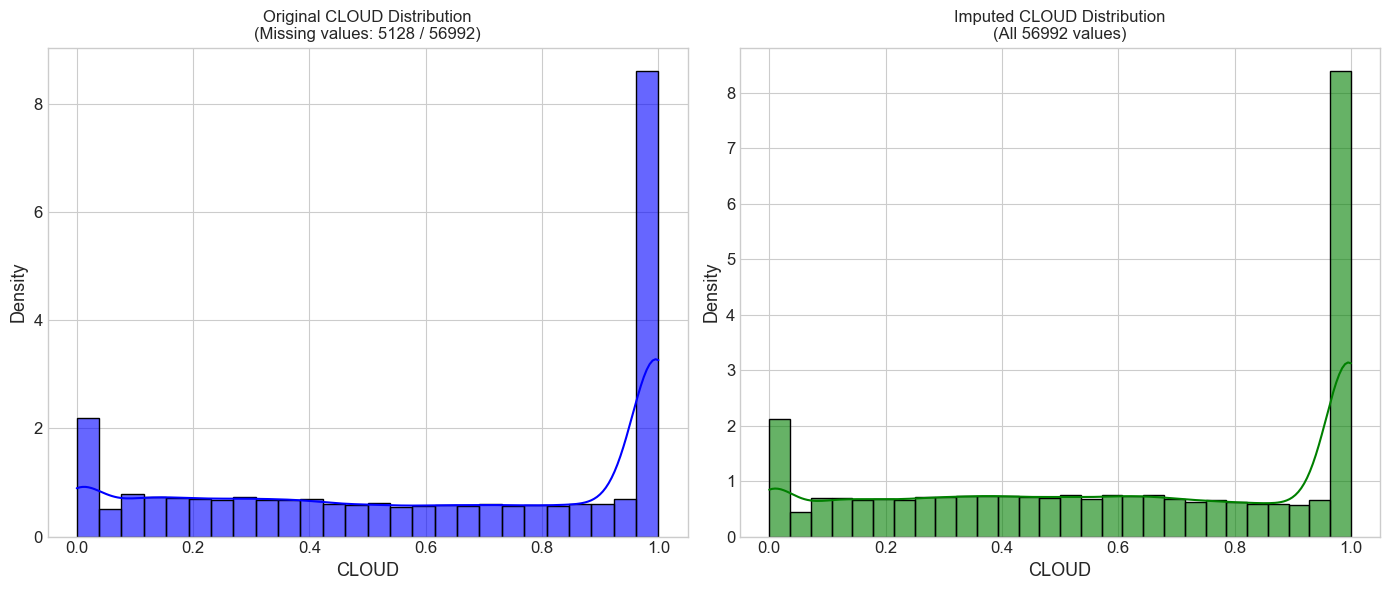

In [54]:
# Create distribution plots for CLOUD
plot_distribution_comparison(atmospheric_consolidated_df, imputed_atmospheric_consolidated_df, 'CLOUD')

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


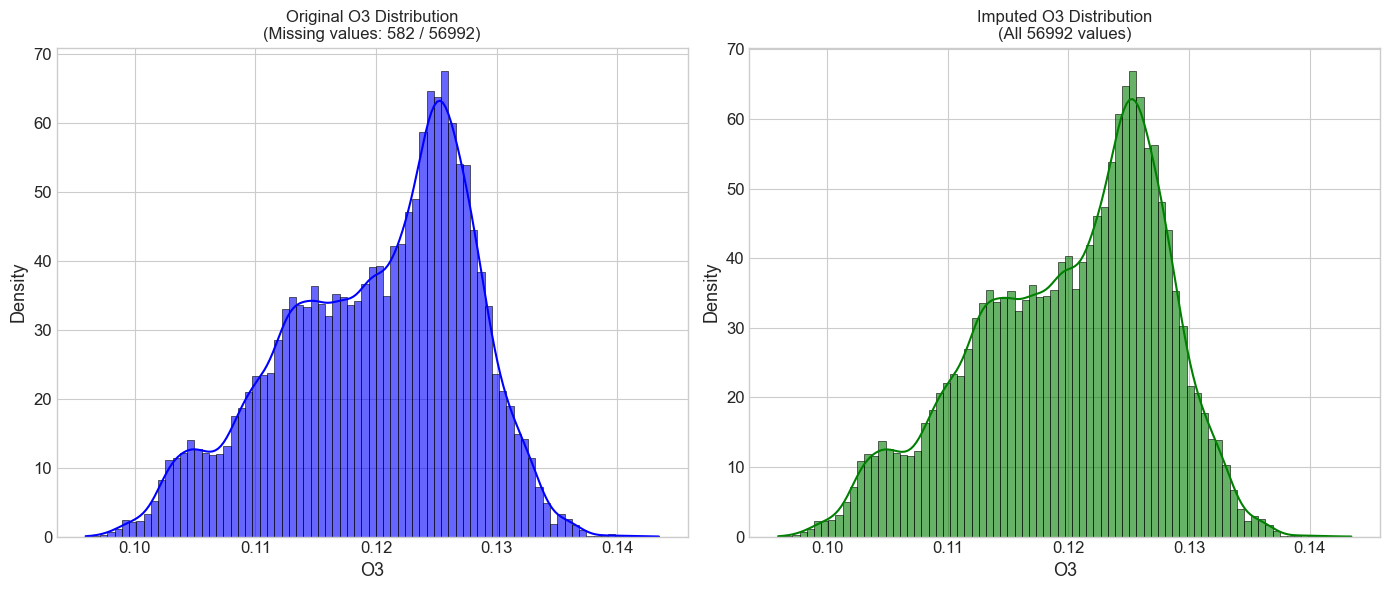

In [55]:
# Create distribution plots for O3
plot_distribution_comparison(atmospheric_consolidated_df, imputed_atmospheric_consolidated_df, 'O3')

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


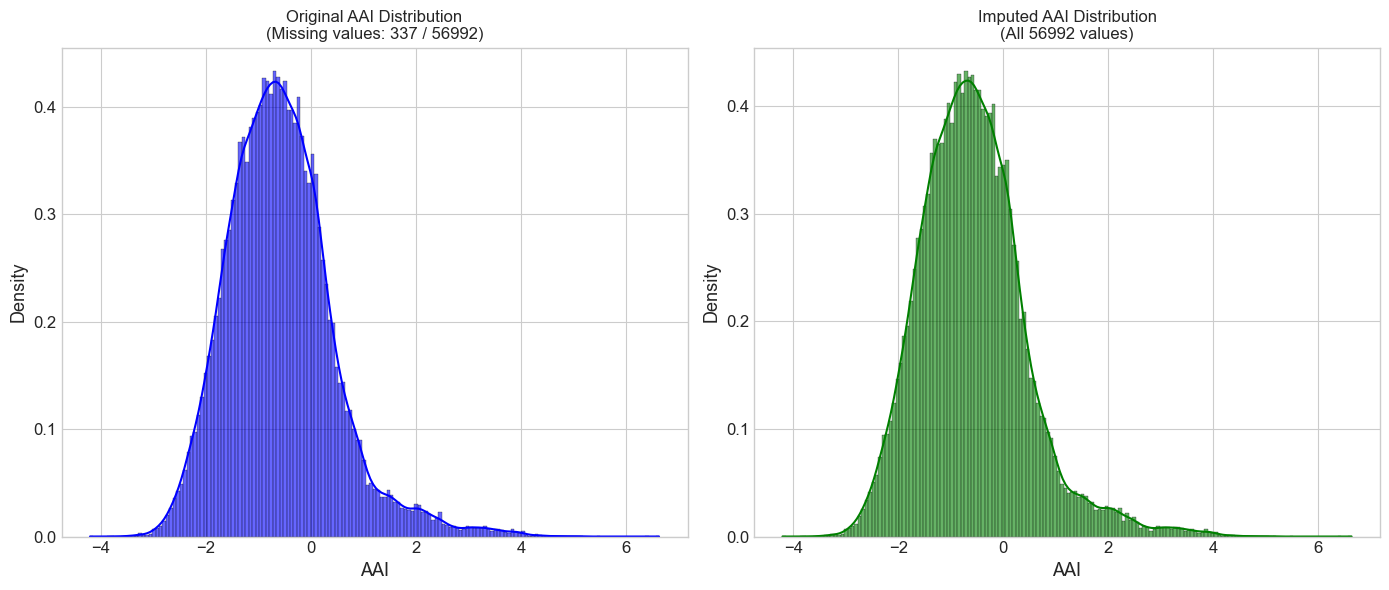

In [56]:
# Create distribution plots for AAI
plot_distribution_comparison(atmospheric_consolidated_df, imputed_atmospheric_consolidated_df, 'AAI')

## Combined Distribution Visualization

Let's also create an overlaid plot to directly compare the distributions before and after imputation.

In [57]:
def plot_overlaid_distributions(original_df, imputed_df, factor):
    plt.figure(figsize=(10, 6))
    
    # Plot original distribution
    sns.kdeplot(original_df[factor].dropna(), label='Original (without missing values)', color='blue', alpha=0.7)
    
    # Plot imputed distribution
    sns.kdeplot(imputed_df[factor], label='After imputation', color='green', alpha=0.7)
    
    plt.title(f'Distribution Comparison for {factor} Before and After Imputation', fontsize=14)
    plt.xlabel(factor, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


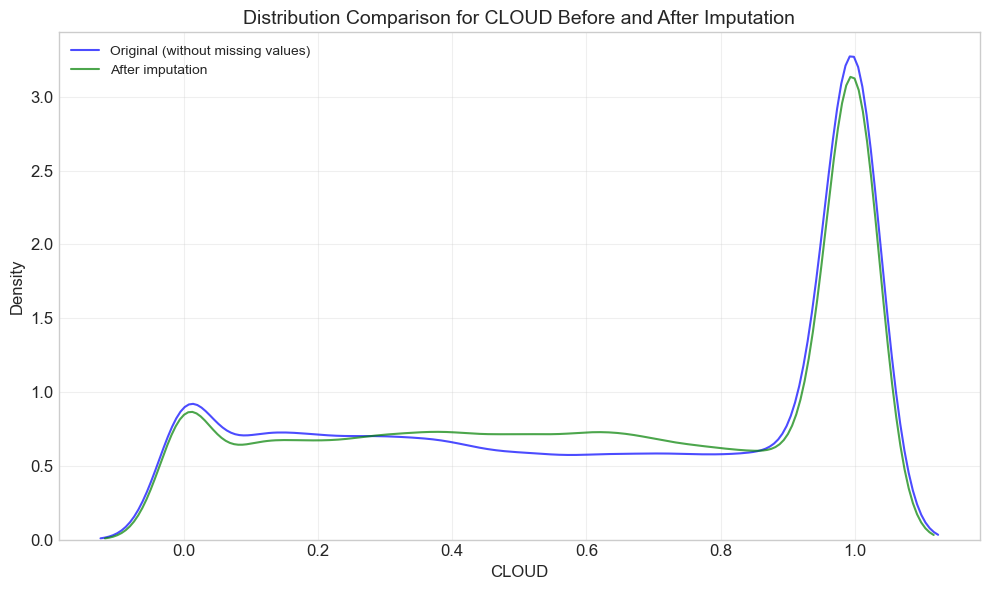

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


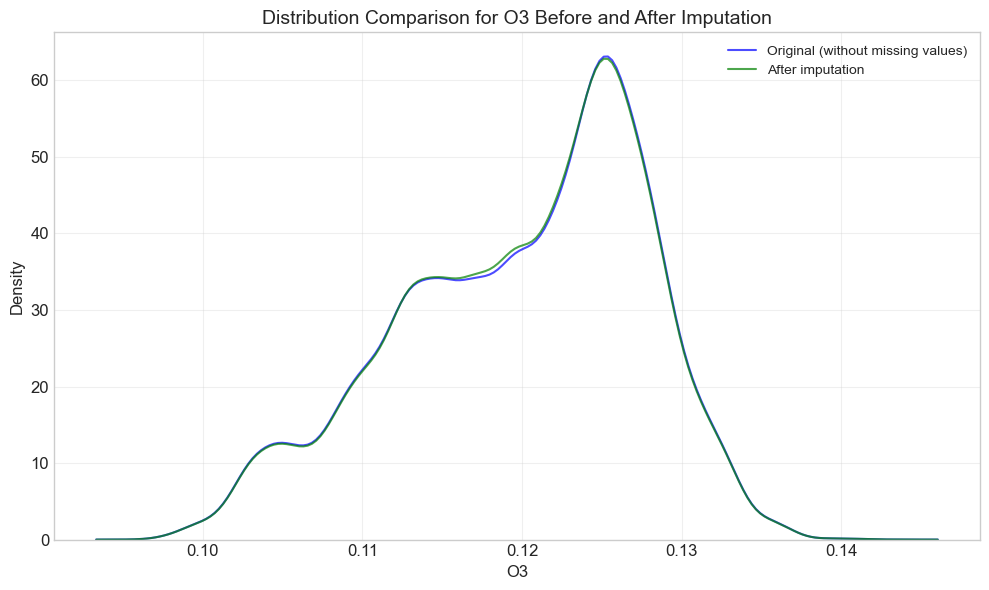

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


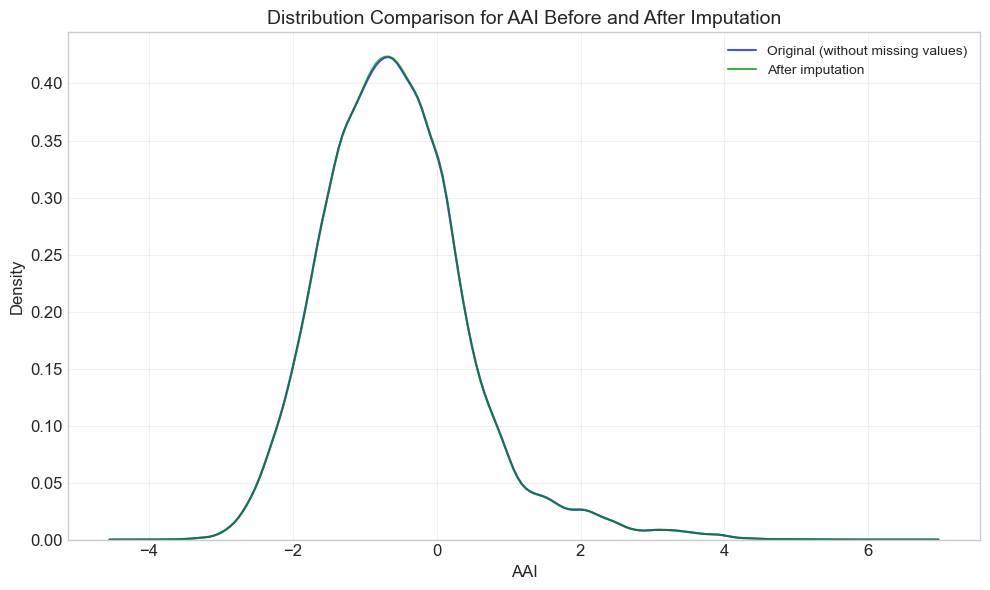

In [58]:
# Create overlaid distribution plots for each selected factor
for factor in selected_factors:
    plot_overlaid_distributions(atmospheric_consolidated_df, imputed_atmospheric_consolidated_df, factor)

In [28]:
selected_factors = ['CLOUD', 'O3', 'AAI']
spatiotemporal_factors = ['lon', 'lat', 'date', 'ID']
# imputed_atmospheric_consolidated_df[spatiotemporal_factors + selected_factors].to_csv('CLOUD_O3_AAI.csv', index=False)

## Statistics Summary of Before and After Imputation

Let's generate summary statistics to quantitatively compare the distributions.

In [40]:
# Statistical comparison
for factor in selected_factors:
    print(f"\n{'-'*50}\nStatistics for {factor}:\n{'-'*50}")
    
    # Original data statistics (dropping NA values)
    original_stats = atmospheric_consolidated_df[factor].dropna().describe()
    print("\nBefore Imputation:")
    print(original_stats)
    
    # Imputed data statistics
    imputed_stats = imputed_atmospheric_consolidated_df[factor].describe()
    print("\nAfter Imputation:")
    print(imputed_stats)


--------------------------------------------------
Statistics for CLOUD:
--------------------------------------------------

Before Imputation:
count    51864.000000
mean         0.614132
std          0.363611
min          0.000000
25%          0.278340
50%          0.680113
75%          1.000000
max          1.000000
Name: CLOUD, dtype: float64

After Imputation:
count    56992.000000
mean         0.609556
std          0.350912
min          0.000000
25%          0.302810
50%          0.649595
75%          1.000000
max          1.000000
Name: CLOUD, dtype: float64

--------------------------------------------------
Statistics for O3:
--------------------------------------------------

Before Imputation:
count    56410.000000
mean         0.120010
std          0.007750
min          0.095919
25%          0.114368
50%          0.121415
75%          0.125966
max          0.143459
Name: O3, dtype: float64

After Imputation:
count    56992.000000
mean         0.120003
std          0.007719
